# Tarea 2
## Sismología Ambiental, Martínez, I.
## Análisis Tiempo-Frecuencia
### El tratamiento, estudio y análisis de señales a lo largo del tiempo ha desarrollado diversas técnicas que permiten la visualización en diferentes dominios espectrales para poder extraer la mayor cantidad posible de información de la señal, dichas técnicas comprenden el análisis dentro del dominio tiempo-frecuencia, ya que inicialmente la señal se presenta en un dominio en particular, éste análisis permite la extracción del espectro del otro dominio en cuestión para poder visualizar características que en el otro no eran evidentes. Cabe destacar que la implementación del análisis tiempo-frecuencia pondera la resolución del dominio en el que se esté trabajando, es decir, cuando se visualiza la señal en el dominio de la frecuencia, el tiempo pierde detalle y viceversa.
### La técnica común para análisis tiempo-frecuencia es la aplicación de la *Transformada de Fourier* (*TF*) la cual permite pasar del dominio temporal de la señal al dominio frecuencial a través de la integral:
\begin{equation}
f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(w) e^{iwt} dw
\end{equation}
### Donde $f(t)$ es la función arbitraria de una señal, $F(w)$ es:
\begin{equation}
F(w) = |A(w)| e^{i\phi(w)}=\int_{-\infty}^{\infty} f(t)e^{-iwt}dt
\end{equation}
### la función de frecuencia angular $(w)$ de la señal, $|A(w)|$ es la amplitud de cada componente harmónico y $\phi(w)$ es el cambio de fase correspondiente *(Lay, T. and Wallace, T. 1995)*.
### Las funciones f(t) y F(w) son los llamados espectros de la señal tiempo y frecuencia respectivamente, cabe mencionar que éste análisis toma en cuenta que las señales tienen un comportamiento estacionario lo cual no ocurre comúnmente en la naturaleza, debido a esto, el resultado tendrá cierto rango de error.
### En el presente análisis se emplea una función *fft*: *Transformada de Fourier Rápida* o *Fast Fourier Transform* por sus siglas en inglés, que comprende un algoritmo en particular para calcular una *Transformada de Fourier Discreta* (DFT), esta *DFT* opera del mismo modo que la *TF* siendo el equivalente de variable discreta:
\begin{equation}
x(n)= \frac{1}{2\pi} \int_{2\pi}^{} X(\Omega)e^{j\Omega n} d\Omega
\end{equation}
### $n$ y $\Omega$ son las variables discretas en *DFT* correspondientes al tiempo y frecuencia respectivamente.

### Para ejemplificar el análisis tiempo-frecuencia de una señal, se crea una función senoidal y su vector de tiempo:

In [4]:
#Construir el vector de tiempo:
f1= 5 #frecuencia 1
f2= 10 #frecuencia 2
s= 5 #tiempo de muestreo
sps= 25 #muestras por segundo
t=collect(linspace(0,s,sps*s)) #vector de tiempo
y= cos.(2*π*t*f1) + sin.(2*π*t*f2); #función senoidal

In [12]:
using PyPlot

### Se construye un vector de "ruido" para mezclar con la función senoidal y así obtener una señal más compleja. A partir de la generación de un vector "g" que muestrea aleatoriamente por medio del comando "rand" un número de muestras igual a la longitud del vector, finalmente se conjunta con la función:

In [27]:
g=rand(length(y)); #Vector de "ruido"
y= cos.(2*π*t*f1) + sin.(2*π*t*f2) + g; #Función senoidal con ruido

In [7]:
using PyPlot

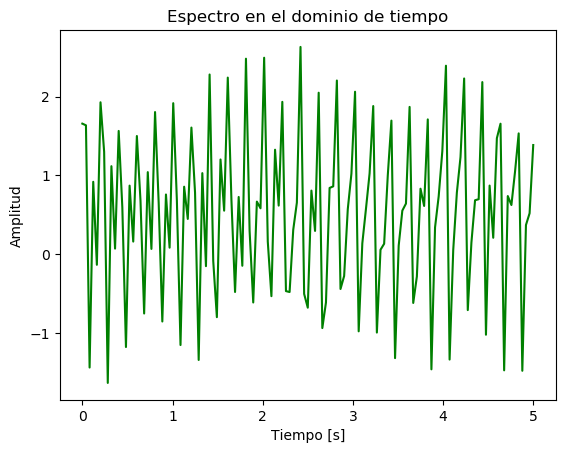

PyObject <matplotlib.text.Text object at 0x000000002CBE42B0>

In [32]:
plot(t,y, "-g")
title("Espectro en el dominio de tiempo")
xlabel("Tiempo [s]")
ylabel("Amplitud")

# Transformada de Fourier Rápida *fft*


In [9]:
#Análisis tiempo-frecuencia usando la transformada de Fourier Rápida
F=abs.(fft(y,1)); #fft representa la transformada de Fourier rápida (fast fourirer transform) en código Julia

In [37]:
#Conctrucción del vector de frecuencias
fv=collect(linspace(0,sps,s*sps));
length(fv)
l=length(fv)/2

62.5

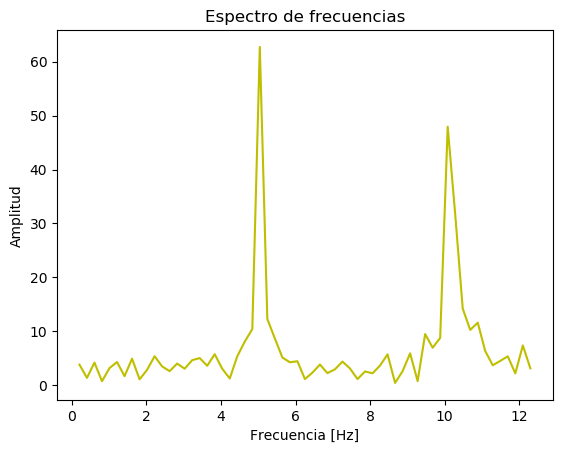

PyObject <matplotlib.text.Text object at 0x000000002DB4EFD0>

In [42]:
plot(fv[2:62],F[2:62], "-y")
title("Espectro de frecuencias")
xlabel("Frecuencia [Hz]")
ylabel("Amplitud") #(?)

### Aplicando fft se obtiene el espectro de frecuencias donde se puede observar las dos frecuencias características de la función senoidal: f1=5 y f2= 10.

#### Referencias
##### Lay, T. and Wallace, T. (1995) Modern Global Seismology pp. 173-190. USA Academic Press.
##### Tary, J. B., R. H. Herrera, J. Han, and M. van der Baan (2014), Spectral estimation—What is new? What is next?, Rev. Geophys., 52, 723–749.
##### Procesamiento Digital de Señales [en línea] (s/f) Universidad Nacional de Córdoba  Disponible: http://www.dsp.efn.unc.edu.ar/documentos/FFT.pdf Consultado: 09/10/17